# Squid Parts

In [1]:
import math

n = 6
for i in range(n):
    angle = i/n
    t = i%2==0 and "_squid_jewel" or "_squid_hood"
    if i>0:
        print(f'{t};a_offset,{angle:.{4}}')
    else:
        print(f'{t};a_offset,{angle:.{4}},cost,5')

for i in range(n):
    angle = i/n
    y_offset = 52.0
    for j in range(4):
        scale = 1-0.8*j/4
        swirl = j/1.5
        print(f'_squid_tentacle;a_offset,{angle:.{4}},scale,{scale:.{4}},swirl,{swirl:.{4}},radius,{8.0*scale:.{4}},y_offset,{y_offset:.{4}}')
        y_offset += 8*scale

_squid_jewel;a_offset,0.0,cost,5
_squid_hood;a_offset,0.1667
_squid_jewel;a_offset,0.3333
_squid_hood;a_offset,0.5
_squid_jewel;a_offset,0.6667
_squid_hood;a_offset,0.8333
_squid_tentacle;a_offset,0.0,scale,1.0,swirl,0.0,radius,8.0,y_offset,52.0
_squid_tentacle;a_offset,0.0,scale,0.8,swirl,0.6667,radius,6.4,y_offset,60.0
_squid_tentacle;a_offset,0.0,scale,0.6,swirl,1.333,radius,4.8,y_offset,66.4
_squid_tentacle;a_offset,0.0,scale,0.4,swirl,2.0,radius,3.2,y_offset,71.2
_squid_tentacle;a_offset,0.1667,scale,1.0,swirl,0.0,radius,8.0,y_offset,52.0
_squid_tentacle;a_offset,0.1667,scale,0.8,swirl,0.6667,radius,6.4,y_offset,60.0
_squid_tentacle;a_offset,0.1667,scale,0.6,swirl,1.333,radius,4.8,y_offset,66.4
_squid_tentacle;a_offset,0.1667,scale,0.4,swirl,2.0,radius,3.2,y_offset,71.2
_squid_tentacle;a_offset,0.3333,scale,1.0,swirl,0.0,radius,8.0,y_offset,52.0
_squid_tentacle;a_offset,0.3333,scale,0.8,swirl,0.6667,radius,6.4,y_offset,60.0
_squid_tentacle;a_offset,0.3333,scale,0.6,swirl,1.333,rad

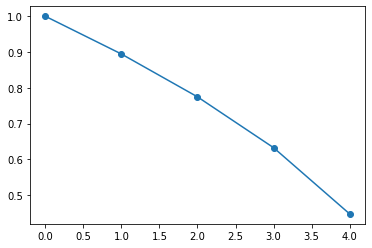

In [12]:
import numpy as np
import matplotlib.pyplot as plt
xv = np.linspace(0, 4, 5) # Generates 30 points between 0 and 4
yv = np.zeros(len(xv))

for i in range(len(xv)):
    yv[i] = np.sqrt(1-0.8*xv[i]/4)


plt.plot(xv, yv, '-o')
plt.show()

# Adjust Vertex Indices

In [19]:
planes="""
1; 2;0;0;2;5;6;7;8;0x0000.0404; -2;32;0;2;20;19;18;17;0x0008.0404; -3;-256;0;1;5;8;20;17;0x0004.0404; 3;768;0;1;7;6;18;19;0x0004.0404; -1;-192;2;1;17;18;6;5;0x0004.0404
2; 2;0;0;2;1;2;3;4;0x0000.0404; -2;32;0;2;16;15;14;13;0x0008.0404; -3;-192;0;1;1;4;16;13;0x0004.0404; 3;832;0;1;3;2;14;15;0x0004.0404; -1;-256;2;1;8;1;13;20;0x0004.0404; -1;-256;2;1;2;7;19;14;0x0004.0404; 1;768;2;1;10;3;15;22;0x0004.0404; 1;768;2;1;4;9;21;16;0x0004.0404
3; 2;0;0;2;9;10;11;12;0x0000.0404; -2;32;0;2;24;23;22;21;0x0008.0404; -3;-256;0;1;9;12;24;21;0x0004.0404; 1;832;2;1;24;12;11;23;0x0004.0404; 3;768;0;1;11;10;22;23;0x0004.0404
"""
out = ""
for plane in planes.splitlines():
  if len(plane)>0:
    surfaces = plane.split(" ")
    out += f"{surfaces[0]} "
    surfaces = surfaces[1:]
    tmp = []
    for surface in surfaces:
      # explode surface
      n,cp,u,v,v0,v1,v2,v3,texture = surface.strip(";").split(";")
      v0 = (int(v0)-1)*3+1
      v1 = (int(v1)-1)*3+1
      v2 = (int(v2)-1)*3+1
      v3 = (int(v3)-1)*3+1
      tmp.append(";".join([n,cp,u,v,str(v0),str(v1),str(v2),str(v3),texture]))
    out += "; ".join(tmp)
    out += "\n"
print(out) 

1; 2;0;0;2;13;16;19;22;0x0000.0404; -2;32;0;2;58;55;52;49;0x0008.0404; -3;-256;0;1;13;22;58;49;0x0004.0404; 3;768;0;1;19;16;52;55;0x0004.0404; -1;-192;2;1;49;52;16;13;0x0004.0404
2; 2;0;0;2;1;4;7;10;0x0000.0404; -2;32;0;2;46;43;40;37;0x0008.0404; -3;-192;0;1;1;10;46;37;0x0004.0404; 3;832;0;1;7;4;40;43;0x0004.0404; -1;-256;2;1;22;1;37;58;0x0004.0404; -1;-256;2;1;4;19;55;40;0x0004.0404; 1;768;2;1;28;7;43;64;0x0004.0404; 1;768;2;1;10;25;61;46;0x0004.0404
3; 2;0;0;2;25;28;31;34;0x0000.0404; -2;32;0;2;70;67;64;61;0x0008.0404; -3;-256;0;1;25;34;70;61;0x0004.0404; 1;832;2;1;70;34;31;67;0x0004.0404; 3;768;0;1;31;28;64;67;0x0004.0404



# Platform Geometry

In [2]:
import numpy as np
import pyvista as pv
import copy

width=256
ear=64
height=32

vertices= [
    # main block
    [ear,0,0],
    [ear,0,2*ear+width],
    [ear+width,0,2*ear+width],
    [ear+width,0,0],
    # left ear
    [0,0,ear],
    [0,0,ear+width],
    [ear,0,ear+width],
    [ear,0,ear],
    # right ear
    [ear+width,0,ear],
    [ear+width,0,ear+width],
    [2*ear+width,0,ear+width],
    [2*ear+width,0,ear]]
n = len(vertices)
for i in range(n):
  v = copy.copy(vertices[i])
  v[1] = -32
  vertices.append(v)

# shift vertices in place
for v in vertices:
  v[0] += 512-width/2-ear
  v[2] += 512-width/2-ear

planes=f"""
1; 5;6;7;8;0x0000.0404; 20;19;18;17;0x0008.0404; 5;8;20;17;0x0004.0404; 7;6;18;19;0x0004.0404; 17;18;6;5;0x0004.0404
2; 1;2;3;4;0x0000.0404; 16;15;14;13;0x0008.0404; 1;4;16;13;0x0004.0404; 3;2;14;15;0x0004.0404; 8;1;13;20;0x0004.0404; 2;7;19;14;0x0004.0404; 10;3;15;22;0x0004.0404; 4;9;21;16;0x0004.0404
3; 9;10;11;12;0x0000.0404; 24;23;22;21;0x0008.0404; 9;12;24;21;0x0004.0404; 24;12;11;23;0x0004.0404; 11;10;22;23;0x0004.0404
"""

meshes=[]
for plane in planes.splitlines():
  if len(plane)>0:
    surfaces = plane.split(" ")
    surfaces = surfaces[1:]
    faces = []
    for surface in surfaces:
      # explode surface
      v0,v1,v2,v3,texture = surface.strip(";").split(";")
      faces.append([4, int(v0)-1,int(v1)-1,int(v2)-1,int(v3)-1])
      
    meshes.append(pv.PolyData(np.array(vertices), np.hstack(faces)))

# surf.plot(show_edges=True, line_width=2)
out = ""
textures = {}
textures[2] = "0x0000.1010"
textures[-2] = "0x0014.0404"

map_displays = {}
map_displays[2] = 1

for i,mesh in enumerate(meshes):
  surface = f"{i+1}; "
  faces = mesh.faces
  normals = mesh.face_normals
  tmp = []
  for j in range(0,len(faces),5):
    v0,v1,v2,v3 = faces[j+1],faces[j+2],faces[j+3],faces[j+4]
    # normal
    n = normals[j//5]
    # major
    major = next(k for k,v in enumerate(n) if v!=0)
    # camera plane
    cp = n[major] * vertices[faces[j+1]][major]
    # uv coords
    u,v = [(2,1),(0,2),(0,1)][major]
    # texture
    major_side = int(np.sign(n[major]) * (major+1))
    texture = textures.get(major_side, "0x0010.0404")
    map_display = map_displays.get(major_side, 0)
    v0,v1,v2,v3 = map(lambda x: x*3 + 1,(v0,v1,v2,v3))
    tmp.append(";".join(map(str,[major_side,cp,u,v,v0,v1,v2,v3,texture,map_display])))
  out += surface + "; ".join(tmp) + "\n"

print(f"radius: {width/2+ear}")

print("------vertices------")
tmp = ""
for v in vertices:
  tmp += ",".join(map(str,v)) + ",\n"
print(tmp)

print("------extents------")
tmp = ""
for i,mesh in enumerate(meshes):
  faces = mesh.faces
  xmin,xmax,ymin,ymax=32000,-32000,32000,-32000
  for j in range(0,len(faces),5):
    for k in range(4):
      v = vertices[faces[j+k+1]]
      xmin = min(xmin,v[0])
      xmax = max(xmax,v[0])
      ymin = min(ymin,v[2])
      ymax = max(ymax,v[2])
  tmp += f"split\"{','.join(map(str,(xmin-8,xmax+8,ymin-8,ymax+8)))}\",\n"
print(tmp)

print("------bsp--------")
print(f"""0;2;0;-1;grid
-1;1;{512-width/2};1;-2
-2;1;{512+width/2};2;3""")
print("----surfaces---------")
print(out)
# generate bsp string
pl = pv.Plotter()
for mesh in meshes:
  pl.add_mesh(mesh)
pl.show()

radius: 192.0
------vertices------
384.0,0,320.0,
384.0,0,704.0,
640.0,0,704.0,
640.0,0,320.0,
320.0,0,384.0,
320.0,0,640.0,
384.0,0,640.0,
384.0,0,384.0,
640.0,0,384.0,
640.0,0,640.0,
704.0,0,640.0,
704.0,0,384.0,
384.0,-32,320.0,
384.0,-32,704.0,
640.0,-32,704.0,
640.0,-32,320.0,
320.0,-32,384.0,
320.0,-32,640.0,
384.0,-32,640.0,
384.0,-32,384.0,
640.0,-32,384.0,
640.0,-32,640.0,
704.0,-32,640.0,
704.0,-32,384.0,

------extents------
split"312.0,392.0,376.0,648.0",
split"376.0,648.0,312.0,712.0",
split"632.0,712.0,376.0,648.0",

------bsp--------
0;2;0;-1;grid
-1;1;384.0;1;-2
-2;1;640.0;2;3
----surfaces---------
1; 2;0.0;0;2;13;16;19;22;0x0000.1010;1; -2;32.0;0;2;58;55;52;49;0x0014.0404;0; -3;-384.0;0;1;13;22;58;49;0x0010.0404;0; 3;640.0;0;1;19;16;52;55;0x0010.0404;0; -1;-320.0;2;1;49;52;16;13;0x0010.0404;0
2; 2;0.0;0;2;1;4;7;10;0x0000.1010;1; -2;32.0;0;2;46;43;40;37;0x0014.0404;0; -3;-320.0;0;1;1;10;46;37;0x0010.0404;0; 3;704.0;0;1;7;4;40;43;0x0010.0404;0; -1;-384.0;2;1;22;1;37;58;0

Widget(value="<iframe src='http://localhost:61326/index.html?ui=P_0x18a3d0c5dc0_1&reconnect=auto' style='width…

In [ ]:
%md
# Spawn sequence

In [2]:
spawns=[
  3	  ,	"SQUID I",
  14	,	"SQUID I",
  19	,	"SQUID I",
  24	,	"SQUID I",
  39	,	"SQUID II",
  39	,	"SPIDER I",
  49	,	"SQUID II",
  49	,	"SQUID I",
  64	,	"SQUID II",
  64	,	"SQUID I",
  79	,	"SQUID II",
  79	,	"SQUID I",
  94	,	"SQUID II",
  94	,	"SQUID I",
  109	,	"SQUID II",
  114	,	"CENTIPEDE",
  119	,	"SPIDER I",
  134	,	"SQUID II",
  134	,	"SQUID I",
  144	,	"SQUID II",
  144	,	"SQUID I",
  154	,	"SQUID II",
  154	,	"SQUID I",
  164	,	"SQUID II",
  164	,	"SQUID I",
  174	,	"CENTIPEDE",
  174	,	"SPIDER I",
  174	,	"SPIDER I",
  174	,	"SPIDER I",
  184	,	"SQUID II",
  184	,	"SQUID I",
  189	,	"SQUID II",
  189	,	"SQUID I",
  194	,	"SQUID II",
  194	,	"SQUID I",
  199	,	"SPIDER I",
  199	,	"SPIDER I",
  199	,	"SPIDER I",
  229	,	"SQUID I",
  229	,	"SQUID I",
  229	,	"SQUID I",
  229	,	"SQUID I",
  229	,	"SQUID I",
  229	,	"SQUID I",
  239	,	"SQUID II",
  239	,	"SQUID II",
  239	,	"SQUID II",
  244	,	"SQUID III",
  259	,	"GIGAPEDE",
  259	,	"GIGAPEDE",
  259	,	"GIGAPEDE",
  274	,	"SPIDER II",
  274	,	"SPIDER I",
  274	,	"SPIDER I",
  289	,	"SPIDER II",
  289	,	"SPIDER I",
  289	,	"SPIDER I",
  304	,	"SQUID III",
  304	,	"SQUID III",
  304	,	"SQUID III",
  330	,	"SQUID II",
  330	,	"SQUID II",
  330	,	"SQUID II",
  350	,	"LEVIATHAN",
  365	,	"SQUID I",
  365	,	"SQUID I",
  365	,	"SQUID I",
  370	,	"SQUID II",
  370	,	"SQUID II",
  370	,	"SQUID II",
  375	,	"SQUID III",
  397	,	"SQUID III",
  400	,	"SQUID II",
  400	,	"SQUID I",
  406	,	"SQUID I",
  406	,	"SQUID II",
  412	,	"GIGAPEDE",
  417	,	"SPIDER I",
  418	,	"SPIDER I",
  419	,	"SPIDER II",
  424	,	"SQUID I",
  424	,	"SQUID I",
  427	,	"SQUID II",
  430	,	"SQUID III",
  440	,	"SQUID I",
  441	,	"SQUID II",
  442	,	"GHOSTPEDE",
  447	,	"THORN",
  449	,	"THORN",
  451	,	"THORN"]


In [3]:
# mapping OG game --> demi daggers
spawn_types={
  "SQUID I":"make_squid;1",
  "SQUID II":"make_squid;2",
  "SQUID III":"make_squid;3",
  "CENTIPEDE":"make_worm;normal",
  "GIGAPEDE":"make_worm;mega",
  "GHOSTPEDE":"make_worm;giga",
  "SPIDER I":"make_spider;1",
  "SPIDER II":"make_spider;2"
}
specials=["CENTIPEDE","GIGAPEDE","GHOSTPEDE","SPIDER I","SPIDER II"]
heights={
  "SPIDER I":48,
  "SPIDER II":48}
small_radius=["CENTIPEDE","GIGAPEDE","GHOSTPEDE"]
spawn_time=0
cmds = []
cmds.append("_scenario=[[random_spawn_angle")
for i in range(0,len(spawns),2):  
  t = spawns[i]
  cls = spawns[i+1]
  spawn_func = spawn_types.get(cls,"//;not supported")
  wait_time = t - spawn_time
  spawn_time = t
  radius = 200
  if wait_time>0:
    cmds.append(f"wait_async;{wait_time*30}")
  if spawns[i+1] in specials:
    cmds.append("random_spawn_angle")
  else:
    cmds.append("inc_spawn_angle;0.25")
  if spawns[i+1] in small_radius:
    radius = 128
  if cls in heights:
    cmds.append(f"set_spawn;{radius};{heights[cls]}")
  else:
    cmds.append(f"set_spawn;{radius}")
  cmds.append(spawn_func)
# end game
cmds.append("set;dead;1;_plyr")
cmds.append("next_state;gameover_state;lIBERATED;256;0.01]]")
with open("../carts/scenario_release.p8l","w") as f:
  f.write("\n".join(cmds))